# K-Means Clustering Algorithm

K-Means Clusterin is an unsupervised machine learning algorithm used for clustering data into $ k $ groups based on feature similarity. K-Means Clustering is a form of **unsupervised learning**, which means that it assigns labels that are *not predefined* to the data.

---

## Step-by-Step Algorithm

1. **Choose the Number of Clusters ($ k $)**:
   - Decide how many clusters ($ k $) you want to divide the data into. 
  
2. **Initialize Cluster Centroids**:
   - Randomly select $ k $ data points from the dataset. These are the initial cluster centroids.

3. **Assign Points to the Nearest Centroid**:
   - For each data point in the dataset, compute the distance to each cluster centroid using a distance metric and assign each data point to the cluster whose centroid is closest.
     - For the distance metric, K-Means can use:
        - Euclidean Distance: $ \sqrt{\sum (x_i - y_i)^2} $
        - Manhattan Distance: $ \sum |x_i - y_i| $

4. **Recompute Cluster Centroids**:
   - For each cluster, calculate the new centroid by taking the mean of all the points assigned to that cluster:
     $$
     \text{Centroid}_k = \frac{1}{n_k} \sum_{i=1}^{n_k} \text{Point}_i
     $$
     where $ n_k $ is the number of points in cluster $ k $.

5. **Repeat Until Convergence**:
   - Reassign points to clusters based on the updated centroids.
   - Recompute the centroids for the new clusters.
   - Repeat steps 3 and 4 until the centroid centers converge.

![K-Means Diagram](k-means-diagram.png)

(Image from u/DineshPiyasamara on reddit.com)

---

## Advantages of K-Means

- Simple and easy to implement.
- Works well with large datasets.
- Computational Complexity: $ O(n \cdot k \cdot t) $, where $ n $ is the number of points, $ k $ is the number of clusters, and $ t $ is the number of iterations — *this is pretty fast*

---

## Limitations

- Requires $ k $ to be specified in advance.
- Sensitive to the initial placement of centroids (can lead to suboptimal solutions).
- Assumes clusters are spherical and equally sized, which may not hold for all datasets.

---

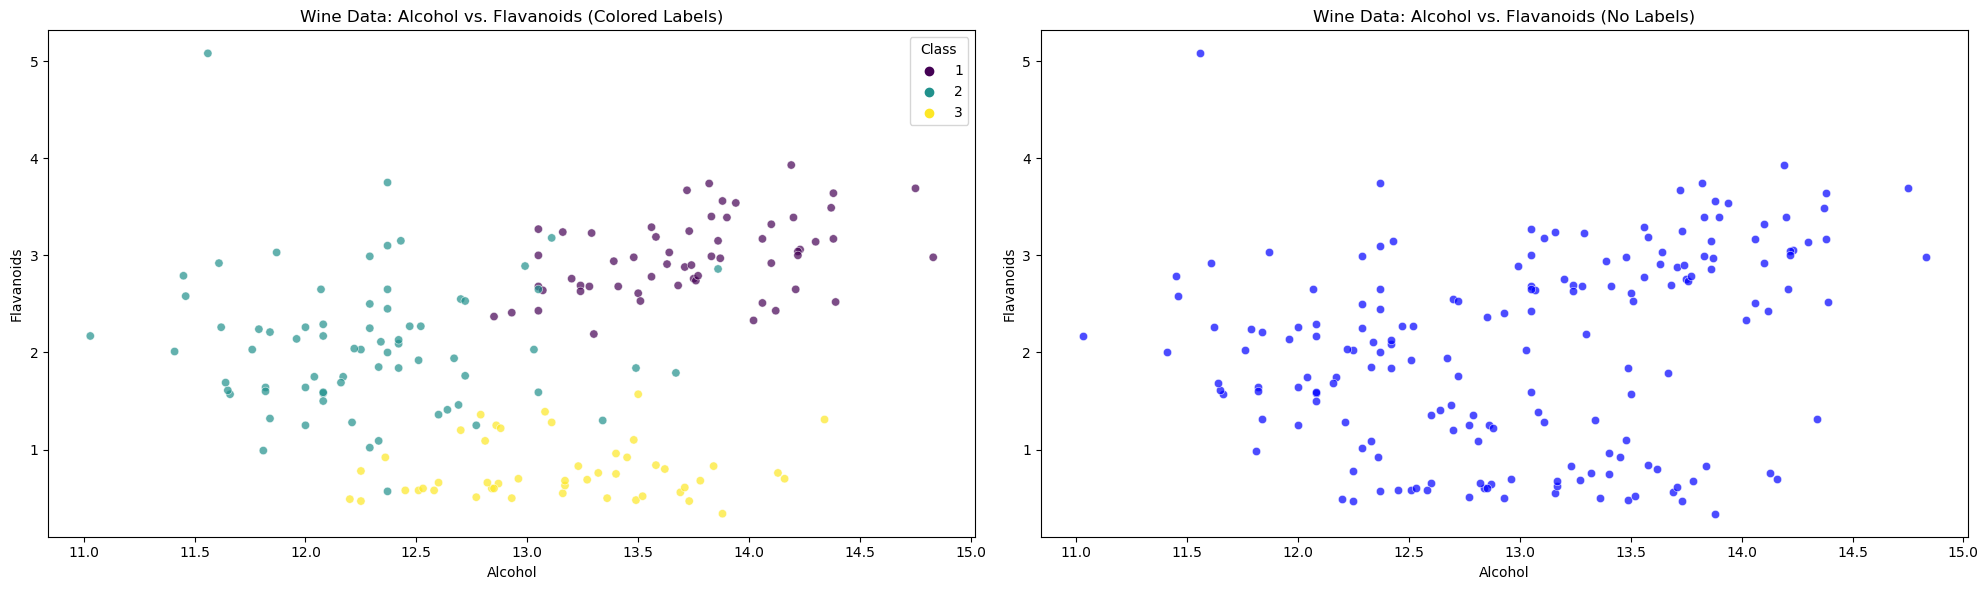

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot with colored labels
sns.scatterplot(data=df, x='Alcohol', y='Flavanoids', hue='Wine', palette='viridis', alpha=0.7, ax=axes[0])
axes[0].set_title('Wine Data: Alcohol vs. Flavanoids (Colored Labels)')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Flavanoids')
axes[0].legend(title='Class', loc='upper right')

# Plot without colored labels
sns.scatterplot(data=df, x='Alcohol', y='Flavanoids', color='blue', alpha=0.7, ax=axes[1])
axes[1].set_title('Wine Data: Alcohol vs. Flavanoids (No Labels)')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('Flavanoids')

# Show the plots
plt.tight_layout()
plt.show()


## K-Means Clustering Algorithm

Now, we will try and predict the clusters on the left graph using only the unlabeled data on the right. Every iteration is tracked and visualized to demonstrate how the algorithm works. The stars represent the center of each centroid at every iteration.

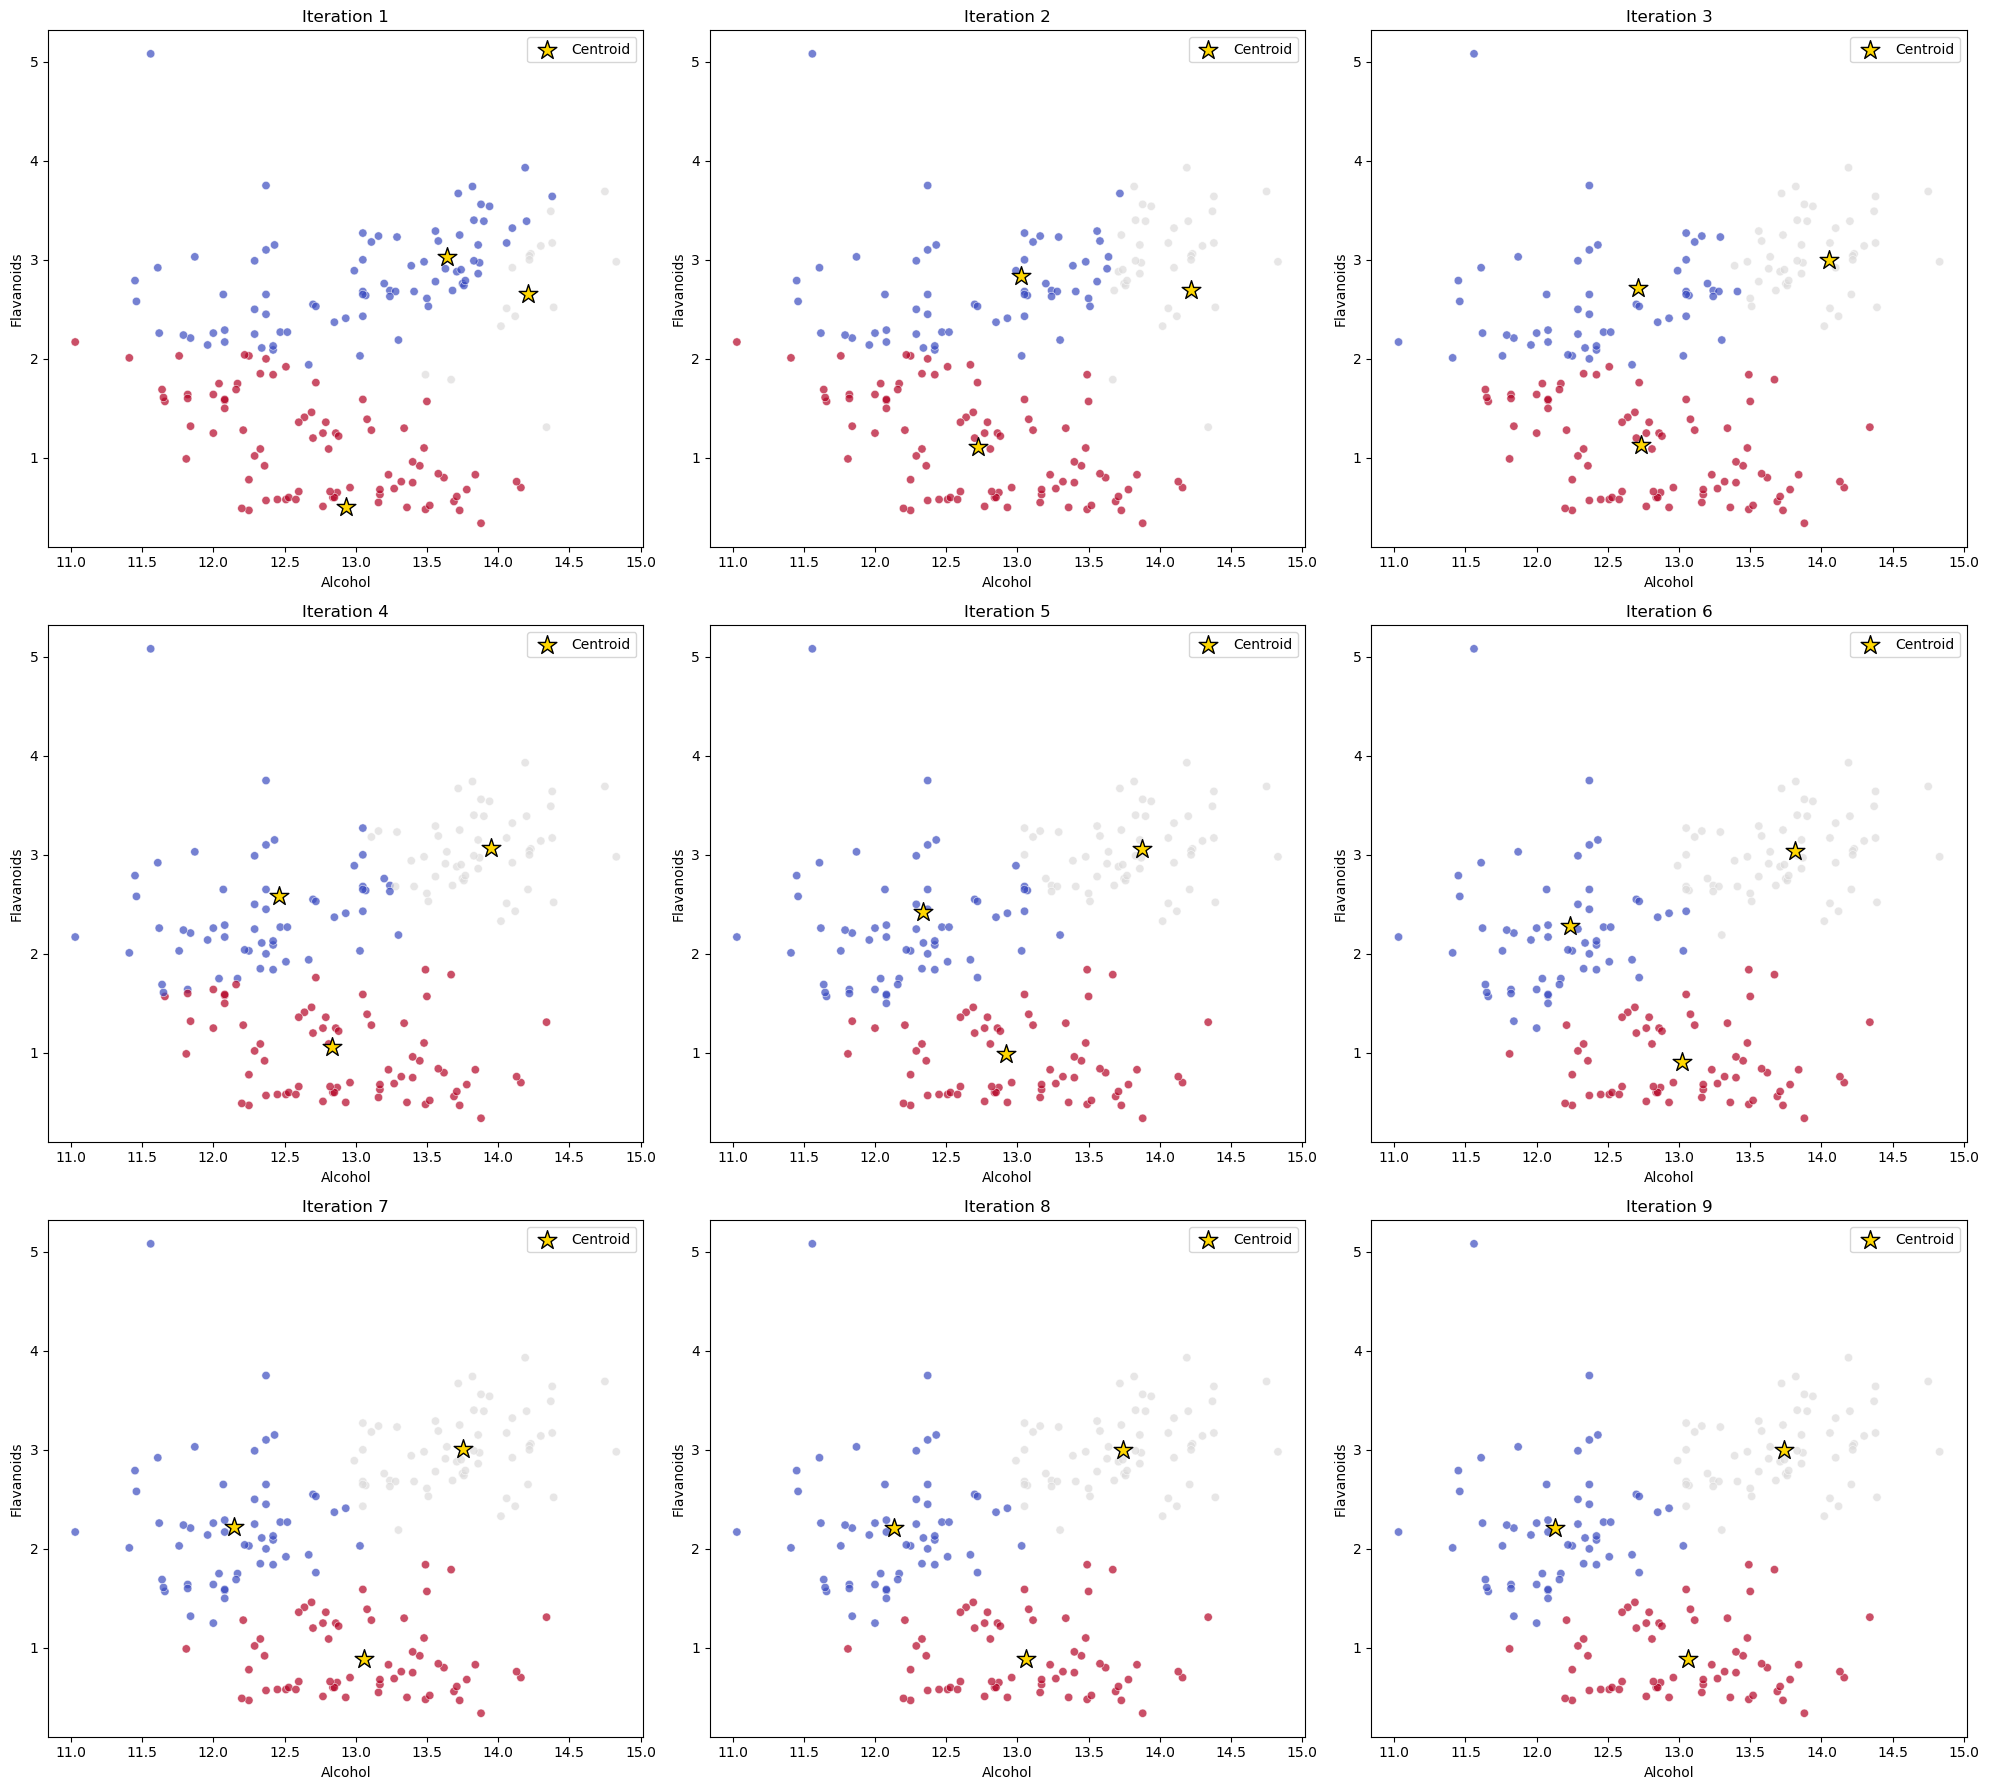

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simple K-Means implementation with iteration plotting
def kmeans_with_plot(X, k, max_iters=10, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    iteration_plots = []

    for iteration in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Save the current state for plotting
        iteration_plots.append((labels.copy(), centroids.copy()))
        
        # Calculate new centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            iteration_plots.append((labels, new_centroids))  # Save the final iteration
            break
        centroids = new_centroids

    return labels, centroids, iteration_plots

# Run K-Means and collect iteration data
k = 3  # Number of clusters
labels, centroids, iteration_plots = kmeans_with_plot(X, k)

# Plot each iteration in an n x 3 grid
n_iterations = len(iteration_plots)
n_rows = (n_iterations + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 6 * n_rows))

for i, (labels, centroids) in enumerate(iteration_plots):
    ax = axes[i // 3, i % 3]
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='coolwarm', ax=ax, legend=None, alpha=0.7)
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='gold', edgecolor='black', marker='*', label='Centroid')
    ax.set_title(f'Iteration {i + 1}')
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Flavanoids')
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, n_rows * 3):
    fig.delaxes(axes[j // 3, j % 3])

plt.tight_layout()
plt.show()


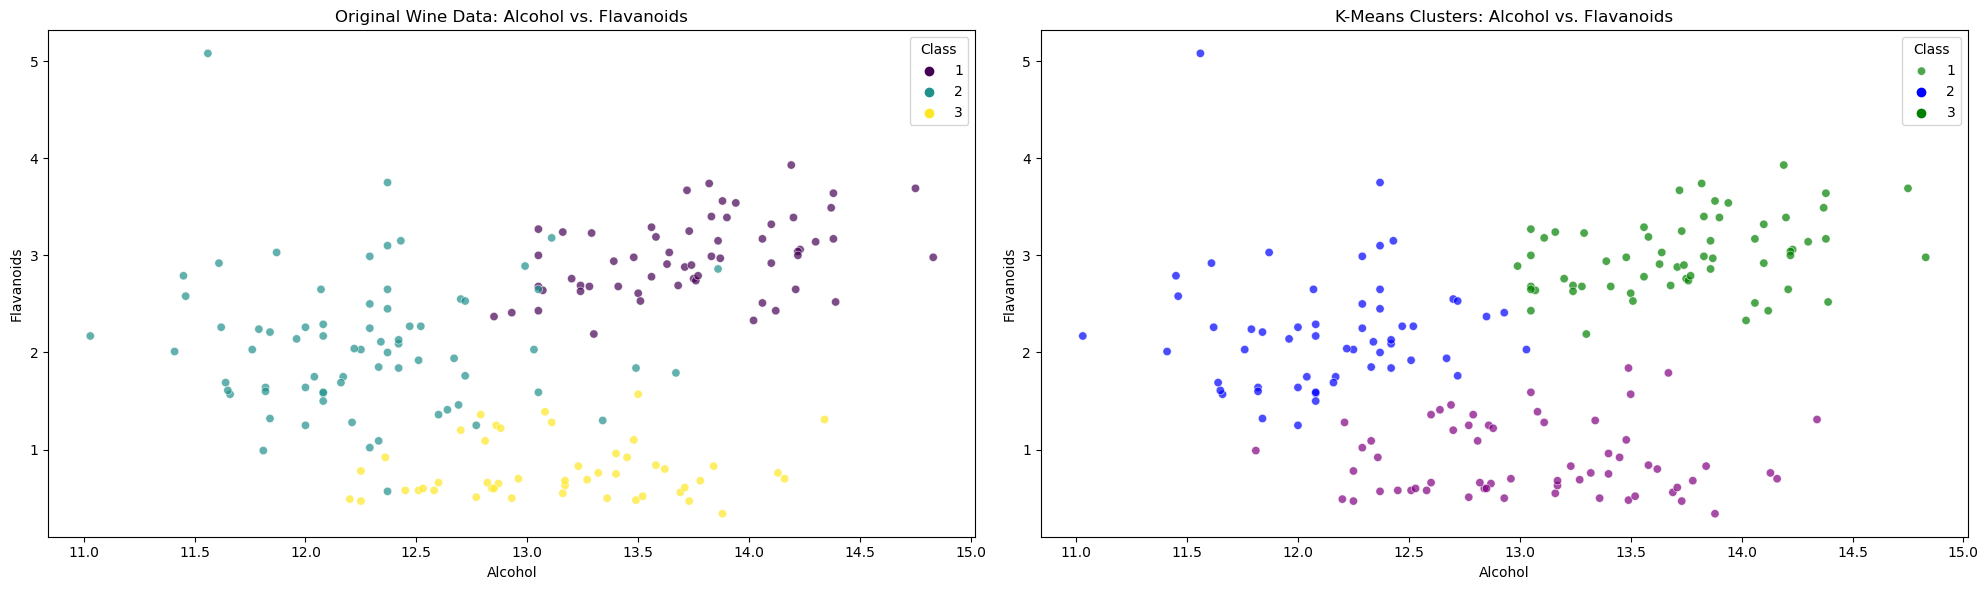

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
X = df[['Alcohol', 'Flavanoids']].values

# Simple K-Means implementation
def kmeans(X, k, max_iters=100, tol=1e-4):
    # Randomly initialize centroids
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign clusters based on closest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Calculate new centroids as the mean of points in each cluster
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    
    return labels, centroids

# Run K-Means on the data
k = 3  # Assuming 3 clusters for the wine dataset
labels, centroids = kmeans(X, k)

# Add cluster labels to the DataFrame
df['Cluster'] = labels + 1

# Plot the original data with predicted clusters
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot with original labels (hue='Wine')
sns.scatterplot(data=df, x='Alcohol', y='Flavanoids', hue='Wine', palette='viridis', alpha=0.7, ax=axes[0])
axes[0].set_title('Original Wine Data: Alcohol vs. Flavanoids')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Flavanoids')
axes[0].legend(title='Class', loc='upper right')

# Plot with K-Means predicted clusters
sns.scatterplot(data=df, x='Alcohol', y='Flavanoids', hue='Cluster', palette={1: 'blue', 2: 'green', 3: 'purple'}, alpha=0.7, ax=axes[1])
axes[1].set_title('K-Means Clusters: Alcohol vs. Flavanoids')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('Flavanoids')
axes[1].legend(title='Class', loc='upper right', labels=['1', '2', '3'])

# Show the plots
plt.tight_layout()
plt.show()


## Results

Our K-Means Clustering algorithm predicted the data pretty well. It is important to note that we explicitly chose for there to be 3 clusters.

## 3D Plot Experiment

Let's try K-Means Clustering in 3 dimensions. We will use the features 'Alcohol', 'Malic', and 'Ash'.

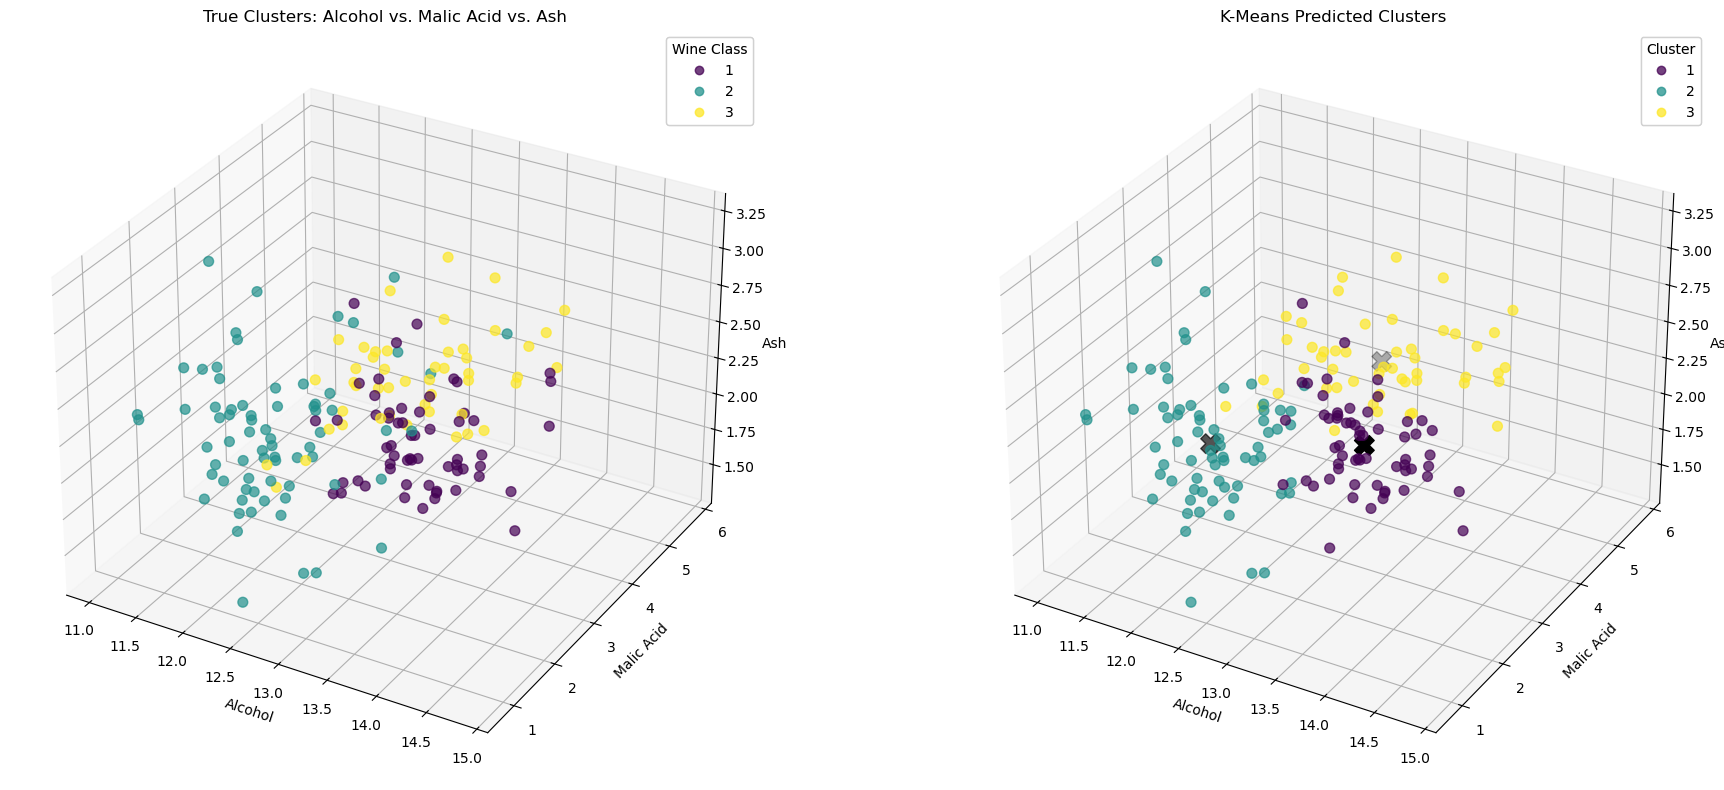

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Select features for 3D clustering
X_3d = df[['Alcohol', 'Malic', 'Ash']].values

# Run K-Means on the data
k = 3  # Fixed number of clusters
labels_3d, centroids_3d = kmeans(X_3d, k)


# Add cluster labels to the DataFrame
df['Cluster_3D'] = labels_3d

# Map cluster labels for the legend to start from 1
df['Cluster_3D_Legend'] = df['Cluster_3D'] + 1  # Add 1 to all cluster labels

color_mapping = {0: 0, 1: 2, 2: 1}  # Swap colors for cluster 0 and 1
df['Cluster_3D_Swapped'] = df['Cluster_3D'].map(color_mapping)

# Create a figure with two 3D subplots
fig = plt.figure(figsize=(20, 8))

# Plot the true clusters
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    df['Alcohol'], df['Malic'], df['Ash'], 
    c=df['Wine'], cmap='viridis', alpha=0.7, s=50
)
ax1.set_title('True Clusters: Alcohol vs. Malic Acid vs. Ash')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Malic Acid')
ax1.set_zlabel('Ash')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Wine Class")
ax1.add_artist(legend1)

# Plot the predicted clusters with updated legend
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(
    df['Alcohol'], df['Malic'], df['Ash'], 
    c=df['Cluster_3D_Swapped'], cmap='viridis', alpha=0.7, s=50
)
ax2.scatter(
    centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], 
    c='black', marker='X', s=200, label='Centroids'
)
ax2.set_title('K-Means Predicted Clusters')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Malic Acid')
ax2.set_zlabel('Ash')

# Update the legend to show labels 1, 2, 3
handles, labels = scatter2.legend_elements()
labels = [str(int(label)) for label in df['Cluster_3D_Legend'].unique()]  # Convert labels to integers
legend2 = ax2.legend(handles, labels, title="Cluster")
ax2.add_artist(legend2)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## Results

Great, Our model performed really well! The clusters are almost identical!

*Wow, took a while to graph!*